<a href="https://www.kaggle.com/code/aleksandrmorozov123/toolbox-for-robotics?scriptVersionId=258010117" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Implementation of algoritms from roboticstoolbox-python library**

In [2]:
!pip install roboticstoolbox-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.3 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / done
  Getting requirements to build wheel ... - \ done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.0/221.0 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 kB 4.9 MB/s eta 0:00:00
  Created wheel for roboticstoolbox-python: filename=roboticstoolbox_python-1.1.1-cp310-cp310-linux_x86_64.whl size=1931974 sha256=9bd2a785624e36f785288c2673da08f36f6e45120c3e8a2b776f09e4b9b33b1f
  Stored in directory: /roo

<Axes: xlabel='X', ylabel='Y'>

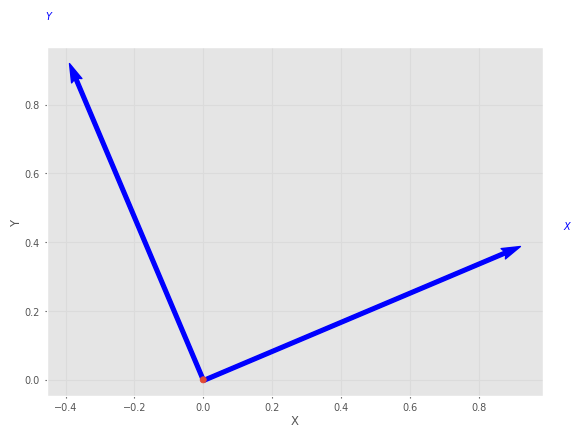

In [3]:
from spatialmath.base import *
from spatialmath import *
import numpy as np
import roboticstoolbox as rtb
from math import pi
import matplotlib.pyplot as plt
from matplotlib import cm
from sympy import Symbol, Matrix, simplify

# create the rotation matrix
R = rot2 (0.4)
trplot2 (R)

In [4]:
# the matrix logarithm
import scipy.linalg

R = rot2 (0.5)
L = scipy.linalg.logm (R)
S = vex (L)

scipy.linalg.expm (L)

array([[ 0.87758256, -0.47942554],
       [ 0.47942554,  0.87758256]])

In [5]:
# skew-symmetric matrix
scipy.linalg.expm (skew (S))

array([[ 0.87758256, -0.47942554],
       [ 0.47942554,  0.87758256]])

In [6]:
# the homogeneous transformation matrix for rotation of 0.5 radian
trot2 (0.5)

array([[ 0.87758256, -0.47942554,  0.        ],
       [ 0.47942554,  0.87758256,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

<Axes: xlabel='X', ylabel='Y'>

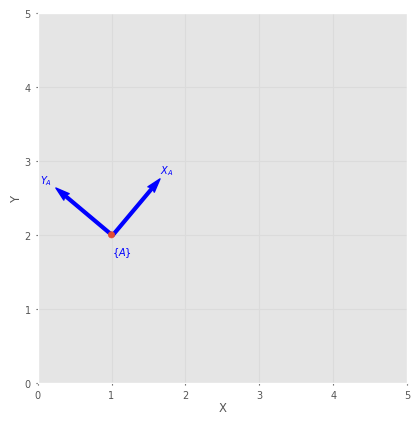

In [7]:
# translation of (1, 2) followed by a rotation of 50
TA = transl2 (1, 2) @ trot2 (50, "deg")
plotvol2 ([0, 5])
trplot2 (TA, frame = "A", color = "b")

<Axes: xlabel='X', ylabel='Y'>

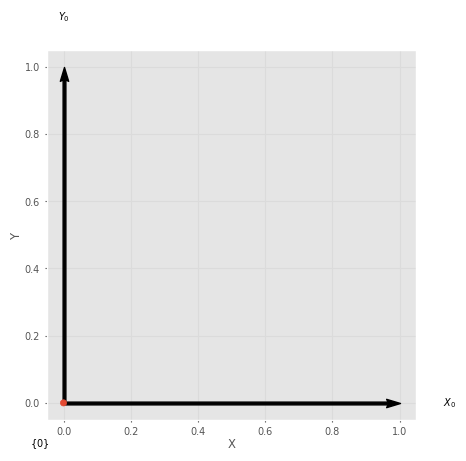

In [8]:
T0 = transl2 (0, 0)
trplot2 (T0, frame = "0", color = "k")

<Axes: xlabel='X', ylabel='Y'>

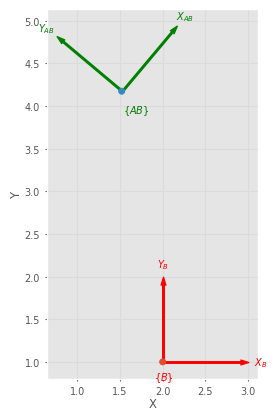

In [9]:
# create relative pose
TB = transl2 (2, 1)
trplot2 (TB, frame = "B", color = "r")
TAB = TA @ TB
trplot2 (TAB, frame = "AB", color = "g")

**Rotation**

<Axes: xlabel='X', ylabel='Y'>

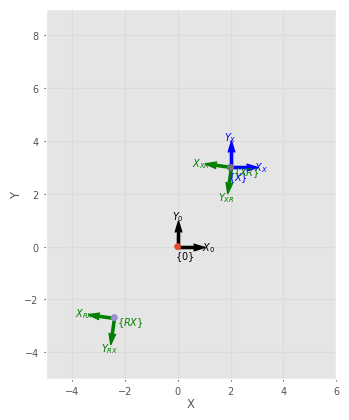

In [10]:
plotvol2 ([-5, 6, -5, 9])
T0 = transl2 (0, 0)
trplot2 (T0, frame = "0", color ="k")
TX = transl2 (2, 3)
trplot2 (TX, frame = "X", color = "b")
TR = trot2 (3)

trplot2 (TR @ TX, frame = "RX", color = "g")
trplot2 (TX @ TR, frame = "XR", color = "g")

<Axes: xlabel='X', ylabel='Y'>

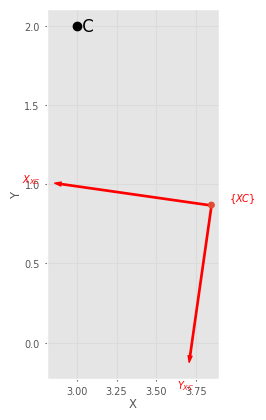

In [11]:
C = np.array ([3, 2])
plot_point (C, "ko", text = "C")
TC = transl2 (C) @ TR @ transl2 (-C)
trplot2 (TC @ TX, frame = "XC", color = "r")

**2-dimensional twists**

In [12]:
S = Twist2.UnitRevolute (C)
scipy.linalg.expm (skewa (3 * S.S))

array([[-0.9899925 , -0.14112001,  6.25221751],
       [ 0.14112001, -0.9899925 ,  3.55662497],
       [ 0.        ,  0.        ,  1.        ]])

In [13]:
S.exp (3)

  -0.99     -0.1411    6.252     
   0.1411   -0.99      3.557     
   0         0         1         


In [14]:
S.pole

array([3., 2.])

In [15]:
S = Twist2.UnitPrismatic ([0, 1])
S.exp (2)

   1         0         0         
   0         1         2         
   0         0         1         


In [16]:
T = transl2 (3, 5) @ trot2 (0.6)
S = Twist2 (T)
S.w

0.6

**3-dimensional rotation**

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

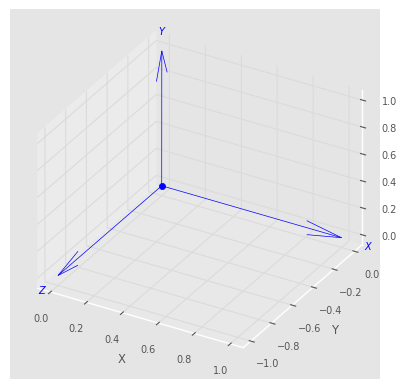

In [17]:
R = rotx (3.14 / 2)
trplot (R)

/opt/conda/lib/python3.10/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


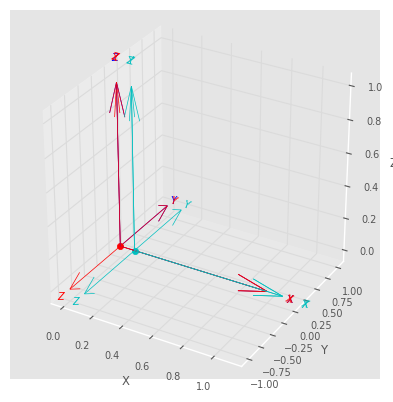

In [18]:
tranimate(R)
trplot (R, anaglyph = True)
tranimate (R, anaglyph = True)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

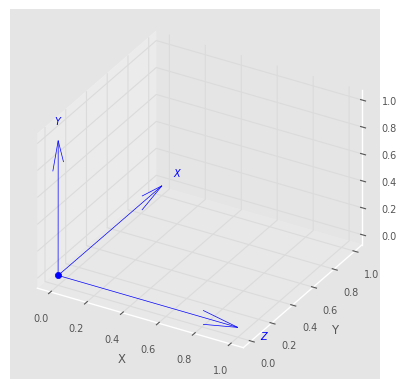

In [19]:
R = rotx (3.14 / 2) @ roty (3.14 / 2)
trplot (R)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

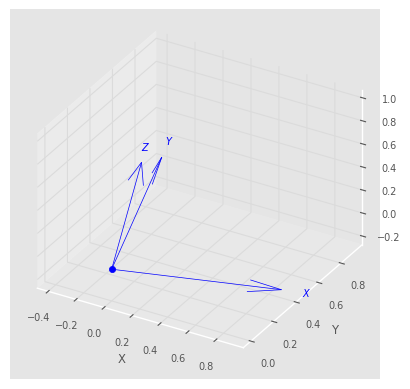

In [20]:
R = rotz(0.2) @ roty(0.3) @ rotz(0.4)
R = eul2r (0.1, 0.2, 0.3)
trplot (R)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

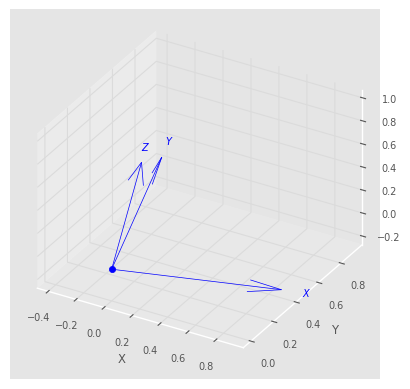

In [21]:
gamma = tr2eul (R)
trplot (R)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

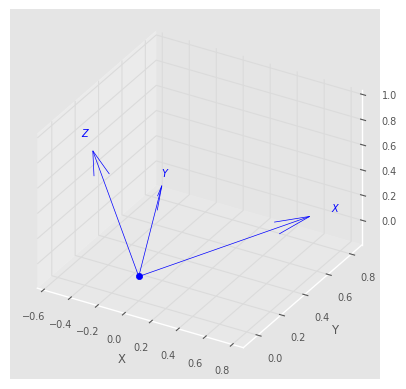

In [22]:
R = eul2r (0.2, - 0.3, 0.4)
trplot (R)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

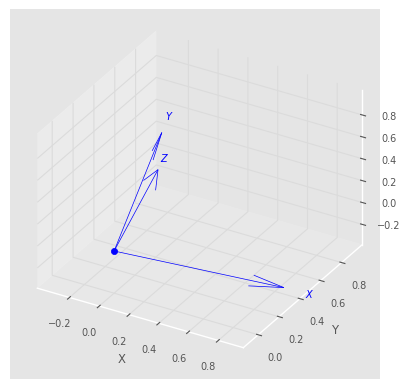

In [23]:
R = rpy2r (0.2, 0.3, 0.4, order = "zyx")
trplot (R)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

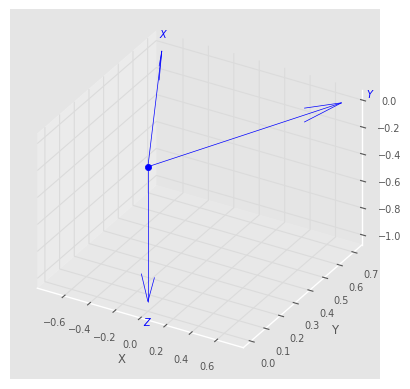

In [24]:
a = [0, 0, -2]
o = [2, 2, 0]
R = oa2r (o, a)
trplot (R)

In [25]:
R = rpy2r (0.2, 0.3, 0.4)
theta, v = tr2angvec (R)
theta

0.5137853254728276

In [26]:
e, x = np.linalg.eig (R)
e

array([0.87089035+0.49147736j, 0.87089035-0.49147736j,
       1.        +0.j        ])

In [27]:
x

array([[-0.68192285+0.j        , -0.68192285-0.j        ,
         0.26450415+0.j        ],
       [ 0.12620529+0.52186033j,  0.12620529-0.52186033j,
         0.65074422+0.j        ],
       [ 0.13803422-0.47713917j,  0.13803422+0.47713917j,
         0.71173698+0.j        ]])

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

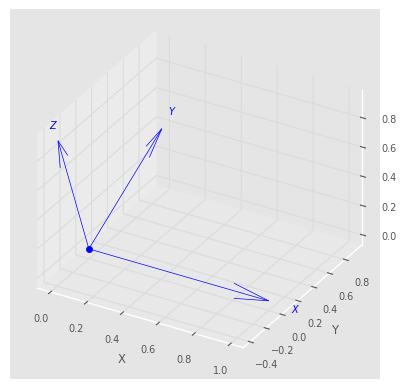

In [28]:
R = angvec2r (0.4, [2, 0, 0])
trplot (R)

In [29]:
q = UnitQuaternion (rpy2r (0.2, 0.3, 0.4))
q.inv ()

 0.9672 << -0.0672, -0.1653, -0.1808 >>


In [30]:
q * q.inv ()
q / q
q.R

array([[ 0.87992318, -0.32757967,  0.3441319 ],
       [ 0.37202555,  0.92556416, -0.07019954],
       [-0.29552021,  0.18979606,  0.93629336]])

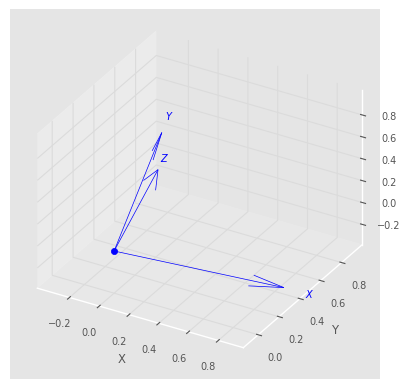

In [31]:
q * [1, 0, 0]
q.plot ()

Axes3D(0.125,0.11;0.775x0.77)


[[<mpl_toolkits.mplot3d.art3d.Line3D at 0x7ebc4940d900>]]

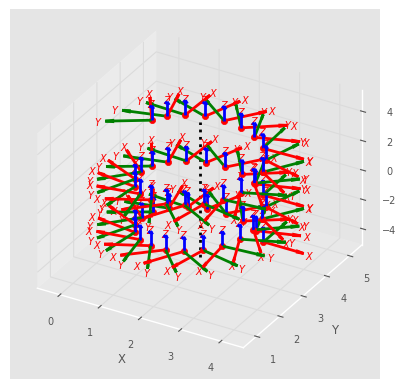

In [32]:
S = Twist3.UnitRevolute ([1, 0, 0], [0, 0, 0])
scipy.linalg.expm (0.3 * skewa (S.S))
S.exp (0.3)
S = Twist3.UnitRevolute ([0, 0, 1], [2, 3, 2], 0.5)
X = transl (3, 4, -4)

for theta in np.arange (0, 15, 0.3):
    trplot (S.exp (theta) .A @ X, style = "rgb", width = 2)

L = S.line ()
L.plot ("k:", linewidth = 2)

A quintic (fifth-order) polynomial: \
$q (t) = A t^5 +B t^4 + C t^3 + D t^2 + E t +  F$ \
where time $ t \in [0, T]$

In [33]:
S = Twist3.UnitPrismatic ([0, 1, 0])
S.exp (3)

   1         0         0         0         
   0         1         0         3         
   0         0         1         0         
   0         0         0         1         


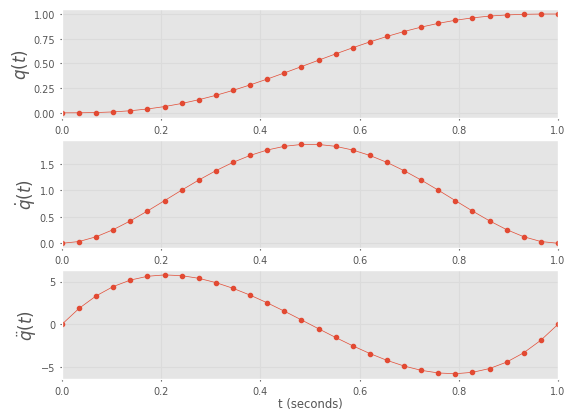

In [34]:
from roboticstoolbox import quintic

traj = quintic (0, 1, np.linspace (0, 1, 30))
traj.plot ()

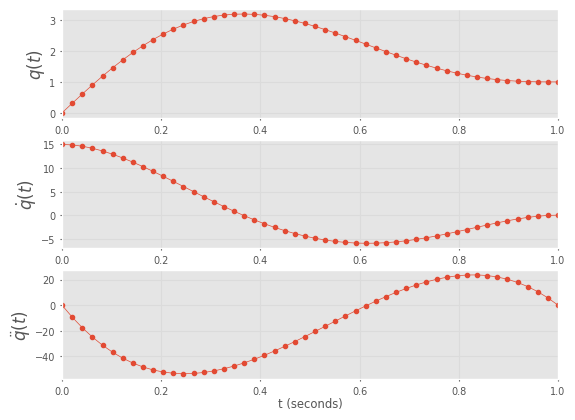

In [35]:
traj = quintic (0, 1, np.linspace (0, 1, 50), qd0 = 15, qdf = 0)
traj.plot ()

In [36]:
qd = traj.qd
qd.mean () / qd.max ()

0.07533340699878016

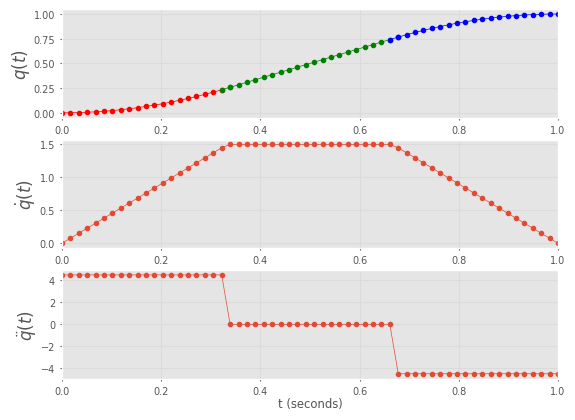

In [37]:
from roboticstoolbox import trapezoidal

traj = trapezoidal (0, 1, np.linspace (0, 1, 60))
traj.plot ()

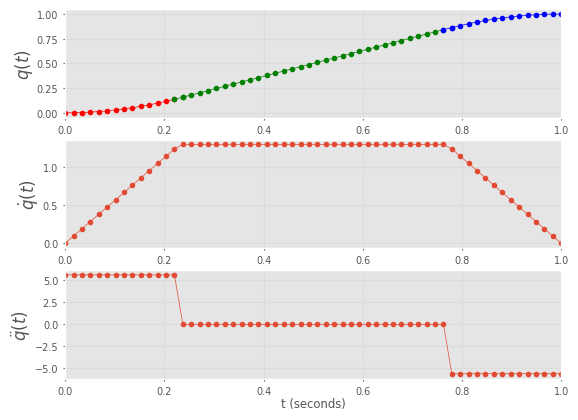

In [38]:
traj1_2 = trapezoidal (0, 1, np.linspace (0, 1, 60), V = 1.3)
traj1_2.plot ()

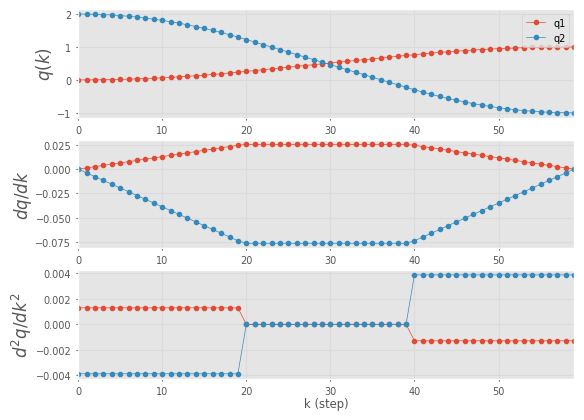

In [39]:
from roboticstoolbox import mtraj

traj = mtraj (trapezoidal, [0, 2], [1, -1], 60)
traj.plot ()

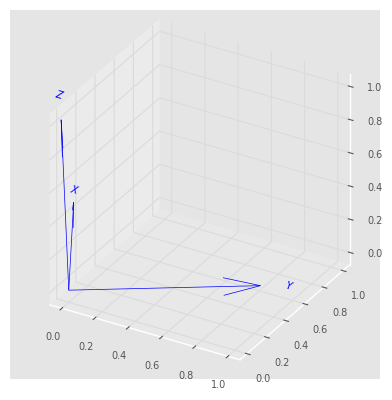

In [40]:
from roboticstoolbox import mstraj, xplot

R0 = SO3.Rz (-1) * SO3.Ry (-1)
R1 = SO3.Rz (1) * SO3.Ry (1)
rpy0 = R0.rpy ()
rpy1 = R1.rpy ()
traj = mtraj (quintic, rpy0, rpy1, 50)
pose = SO3.RPY (traj.q)
pose.animate ()

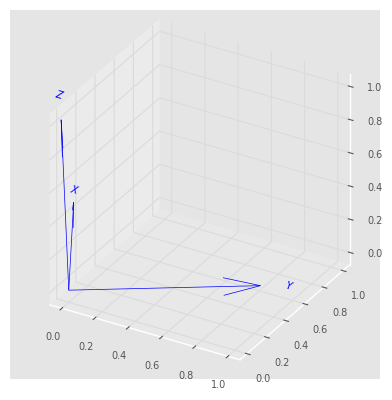

In [41]:
q0 = UnitQuaternion (R0)
q1 = UnitQuaternion (R1)
qtraj = q0.interp (q1, 50)
qtraj.animate ()

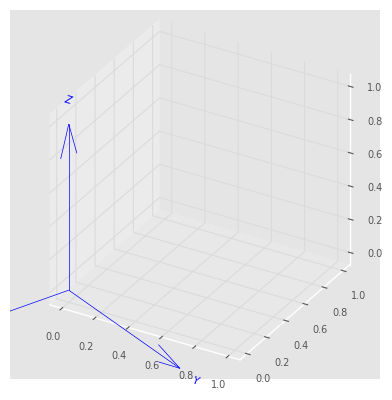

In [42]:
q0 = UnitQuaternion.Rz (-2)
q1 = UnitQuaternion.Rz (2)
q = q0.interp (q1, 50)
q.animate ()

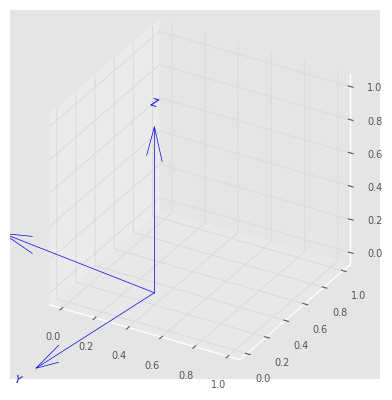

In [43]:
T0 = SE3.Trans ([0.4, 0.2, 0]) * SE3.RPY (0, 0, 3)
T1 = SE3.Trans ([-0.4, -0.2, 0.3]) * SE3.RPY (-3.14/4, 3.14/4, -3.14/2)
T0.interp (T1, 0.5)
Ts = T0.interp (T1, 51)
Ts.animate ()

**Example for model Puma 560 robot**

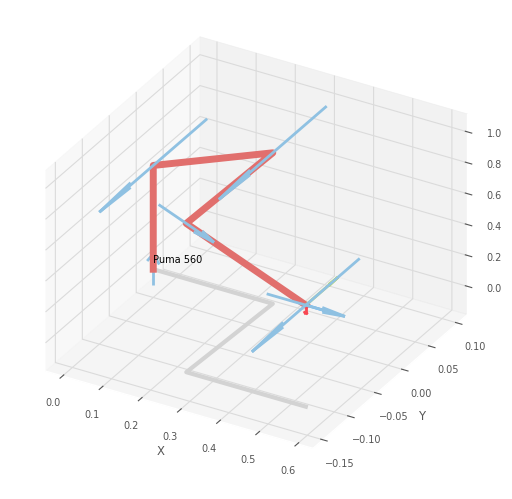

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Puma 560')

<Figure size 640x480 with 0 Axes>

In [44]:
np.set_printoptions (linewidth=100, formatter = {'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

# we will instatiate a model of the Puma 560 robot which has well known inertial parameters
p560 = rtb.models.DH.Puma560()

# show configuration of Puma560 in a typical desktop working pose
p560.plot (p560.qn, block=False)

The rigid-body equations of motion for a robot are a set of coupled differential equations
$$ M(\ddot{q}) \ddot{q} + C(q, \dot{q})\dot{q} + g(q) = \tau$$
which relate the motion of the robot $(q, \dot{q}, \ddot{q})$ and the applied torque $\tau$. The coefficients in this equation are:
- the inertia of mass matrix $M(\ddot{q})$ which is a function of joint configuration
- item the centripetal and Coriolis or velocity term which is a function of joint configurartion and rate
- item the gravity load which is a function of joint copnfiguration
If the robot is not moving, that is $q = \dot{q} = 0$ then the equation becomes
$$ g(q)=\tau $$
where $\tau$ is the torque required for this condition $ q=\dot{q}=0$ to be true, that is, the torque required to stop the robot falling under its own weight. The toolbox can compute this

In [45]:
p560.gravload(p560.qn)

array([       0,    31.64,    6.035,        0,  0.02825,        0])

and it shows, as expected, that the shoulder is exerting significant torque to hold the arm up and stationary. The inertia matrix relates torque to joint acceleration and is the mass in a multi-dimensional version of Newton's second law $F=ma$. In this configuration the inertia matrix is

In [46]:
p560.inertia(p560.qn)

array([[   3.659,  -0.4044,   0.1006, -0.002517,        0,        0],
       [ -0.4044,    4.414,   0.3509,        0,  0.00236,        0],
       [  0.1006,   0.3509,   0.9378,        0,  0.00148,        0],
       [-0.002517,        0,        0,   0.1925,        0, 2.828e-05],
       [       0,  0.00236,  0.00148,        0,   0.1713,        0],
       [       0,        0,        0, 2.828e-05,        0,   0.1941]])

The diagonal elements $M_{jj}$ indicate the inertia experienced by the joint $j$, i.e. Newton's second law for this joint is $\tau_j = M_{jj} \ddot{q}_j$.
The matrix is symmetric and the off-diagonal terms $M_{ij}=M_{ji}$ couple acceleration of one joint into a disturbance torque on another joint, i.e. $\tau_j = M_{ij} \ddot{q}_i$.
The inertia matrix is a function of joint configuration, that is, the elements of the inertia matrix change as we vary the angles of joints 1 and 2,i.e. $q_2$ and $q_3$. It is configuration varying inertia and coupling between joints that is a fundamental challenge for high-quality joint control.

In [47]:
N = 100
(Q2, Q3) = np.meshgrid (np.linspace (-pi, pi, N), np.linspace (-pi, pi, N))
M11 = np.zeros ((N, N))
M12 = np.zeros ((N, N))
for i in range (N):
    for j in range (N):
        M = p560.inertia (np.r_[0, Q2 [i, j], Q3 [i, j], 0, 0, 0])
        M11 [i, j] = M [0, 0]
        M12 [i, j] = M [0, 1]

We see the inertia by joint 1 varies as a function of $q_2$ and $q_3$ as shown below

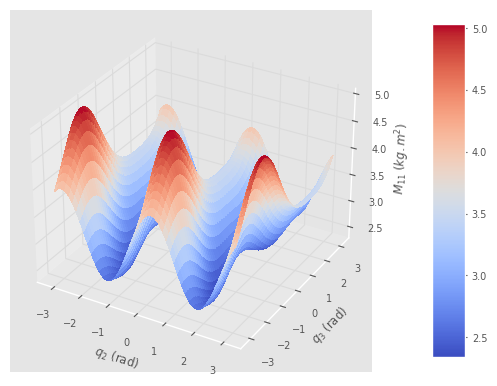

In [48]:
fig, ax = plt.subplots (subplot_kw = {"projection": "3d"})
surf = ax.plot_surface (Q2, Q3, M11, cmap = cm.coolwarm, linewidth = 0, antialiased = False)
fig.colorbar (surf, shrink = 0.9, aspect = 10, pad = 0.12)
ax.set_xlabel ('$q_2$ (rad)')
ax.set_ylabel ('$q_3$ (rad)')
ax.set_zlabel ('$M_{11}$ ($kg.m^2$)')
plt.show()

The velocity terms are a bit harder to comprehend but the mean that rotation of one joint (and its link) can exert a torque on other joints. Consider that the should joint is rotating at 1 rad/sec, then the torque will be

In [49]:
qd = np.r_[0, 1, 0, 0, 0, 0]
p560.coriolis (p560.qn, qd) @ qd

array([  -0.567,        0,  -0.3858,        0, 4.134e-05,        0])

and we see that it exerts a torque on the waist and elbow joints. The algorithms to compute the various terms in the rigid-body equations of motion are based on the recurcive Newton-Euler algorithm

In [50]:
p560.rne (p560.qn, np.zeros ((6,)), np.zeros ((6,)))

array([       0,    31.64,    6.035,        0,  0.02825,        0])

which computes $\tau = rne (q, \dot{q}, \dot{q}$ and can accept additional arguments such as gravity or a wrench applied to the ebd-effector. In the Toolbox this algorithm is implemented in C for maximum performance.
The example above computes the gravity load, cross check it with the result computed earlier. We can rearrange the equation of motion as
$$ \ddot{q} = M (\ddot{q})^{-1} \{\tau - C(q, \dot{q})\dot{q} - g(q)\} $$
which is the joint acceleration for a robot in the state $(q, \dot{q})$ with an applied torque of $\tau$. If we integrate this we can compute the trajectory of the joint coordinates (and velocities) as a function of time

In [51]:
p560nf = p560.nofriction()
tg = p560nf.fdyn (5, p560.qn, dt = 0.05)

The first line needs some explanation. The Toolbox can model two types of joint friction:
- viscous friction which is linearly related to joint velocity
- Coulomb friction which is non-linearly related to joint velocity
Coulomb friction is a harsh non-linearity and it causes the numerical integrator to takevery small times steps, so the result will take many minutes to compute. To speed things up, at the expense of some modeling fidelity, we set the Coulomb friction to zero, but retain the viscous friction. The nofriction() method returns a clone of the robot with its friction parameters modified. The computed joint configuration trajectory is

In [52]:
tg.q

array([[       0,   0.7854,    3.142,        0,   0.7854,        0],
       [-0.001454,   0.7675,    3.133, -1.717e-05,   0.7853, -1.512e-08],
       [-0.003912,   0.7365,    3.118, -4.582e-05,    0.785, -4.506e-08],
       [-0.00637,   0.7055,    3.103, -7.446e-05,   0.7848, -7.5e-08],
       [-0.009225,   0.6509,    3.084, -0.0001022,   0.7843, -1.79e-07],
       [-0.01243,    0.575,    3.062, -0.0001291,   0.7835, -3.494e-07],
       [-0.01564,   0.4991,    3.039, -0.000156,   0.7827, -5.198e-07],
       [-0.01885,   0.4232,    3.017, -0.0001829,    0.782, -6.901e-07],
       [-0.01829,   0.3167,     3.01, -0.0001608,   0.7808, -4.723e-07],
       [-0.01623,    0.198,    3.009, -0.0001192,   0.7795, -1.008e-07],
       [-0.01418,  0.07928,    3.009, -7.756e-05,   0.7782, 2.707e-07],
       [-0.01212, -0.03941,    3.008, -3.596e-05,   0.7769, 6.421e-07],
       [-0.006575,  -0.1645,    3.022, 1.513e-05,   0.7755, 1.62e-06],
       [ 0.00807,  -0.3062,     3.07, 9.094e-05,   0.7741, 4

or we can showing that the robot collapsing under gravity

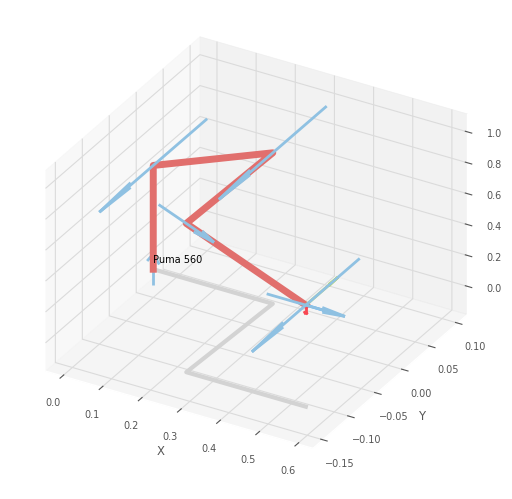

PyPlot3D backend, t = 4.99999999999999, scene:
  robot: Text(0.0, 0.0, 'Puma 560')

<Figure size 640x480 with 0 Axes>

In [53]:
p560.plot (tg.q)